<a href="https://colab.research.google.com/github/Kent7474/Proyecto_Seminario/blob/v2/An%C3%A1lisis_de_activos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DE LIBRERÍAS

In [736]:
# Frameworks principales
import pandas as pd
import numpy as np

# from pandas_datareader import data as pdr #No está funcionando
import yfinance as yf

# Frameworks secundarios
from datetime import datetime
    # Visualización
import matplotlib.pyplot as plt
import statistics
import seaborn as sns




In [737]:
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', 15)

# DEFINICIÓN DE ACTIVOS Y FECHAS

## Periodos - Fecha inicio y fin

In [738]:
 #  YYYY-mm-dd
fechaInicio = "2017-01-01"
#today = "2022-11-01"
today = datetime.today().strftime('%Y-%m-%d')

In [739]:
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "ENPH", "META", "PEP", "TSLA", "V", "CAR", "TTD", "AMGN", "AAL", "TMUS", "CPRX", "ICPT"]
#activos = ["AAPL", "MSFT", "AMZN", "GOOGL", "META", "TSLA", "V"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV"]
#activos = ["RIOT", "WKHS", "SPCE", "OSTK", "TSLA", "PLUG", "ZM", "QS", "BYND", "XPEV", "AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "V", "DIS", "PFE", "KO"]

''' NASDAQ, más rendimiento a mayor riesgo'''
activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC"] # ESTAAAA

#activos = ["AMD","LCID", "MNST", "BIIB", "NVDA", "ADBE", "NFLX", "INTC", "HON","GFS", "FISV", "FAST", "EXC", "CSX", "CRWD", "COST", "MELI", "META", "MRVL", "MAR", "LULU", "HON", "GFS" ]
#activos = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'JNJ', 'PG', 'V', 'JPM', 'KO', 'PEP', 'XOM', 'CVX', 'T', 'VZ', 'INTC', 'CSCO', 'ADBE', 'CRM', 'ABT', 'AMGN', 'UNH', 'PFE', 'MRK', 'BMY', 'RTX', 'LMT', 'GS', 'MA']


''' Excel facu '''
#activos = ['FNKO', 'PEP', 'MCD', 'SONY', 'DIS', 'CMCSA', 'NTDOY', 'CCOEY', 'MDLZ', 'GME']

'''Excel práctica en clase '''
#activos = ['TSLA', 'META', 'AAPL', 'AMZN', 'NFLX']

len(activos)

8

# DESCARGA Y VISUALIZACIÓN DE RENDIMIENTOS.
(Columna 'Adj Close') desde Yahoo Finance.

In [740]:
''' Con la función yf.download descargamos los rendimientos de cada activo
    según las fechas dadas (fechaInicio y today). De todas las columnas que
    nos trae, nos quedamos con 'Adj Close' '''
#dataSet = yf.download(activos, start=fechaInicio, end=today)['Adj Close']
dataSet = yf.download(activos, start=fechaInicio, end=today, interval='1mo')['Adj Close']

''' Revisamos los primero y los últimos 3 registros del DataFrame,
     para asegurarnos que tenga datos.'''
display(dataSet)
pd.DataFrame(dataSet).to_excel("DataSet.xlsx")
#display(dataSet.head(3))
#display(dataSet.tail(3))

[*********************100%***********************]  8 of 8 completed


,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2017-01-01,113.379997,10.370000,277.239990,30.672079,NaN,21.299999,140.710007,26.907394
2017-02-01,118.339996,14.460000,288.600006,30.155605,NaN,20.719999,142.130005,25.009735
2017-03-01,130.130005,14.550000,273.420013,30.261812,NaN,23.084999,147.809998,26.879656
2017-04-01,133.740005,13.300000,271.209991,30.328926,NaN,22.690001,152.199997,25.737162
2017-05-01,141.860001,11.190000,247.770004,30.295378,NaN,25.280001,163.070007,35.619942
...,...,...,...,...,...,...,...,...
2023-02-01,323.950012,78.580002,269.859985,24.529438,9.13,50.880001,322.130005,232.096558
2023-03-01,385.369995,98.010002,278.029999,32.536758,8.04,54.009998,345.480011,277.694061
2023-04-01,377.559998,89.370003,304.230011,30.933327,7.94,56.000000,329.929993,277.461273


In [741]:
dataSet.max()

ADBE    669.849976
AMD     158.369995
BIIB    353.489990
INTC     59.395271
LCID     52.980000
MNST     58.619999
NFLX    690.309998
NVDA    426.875824
dtype: float64

### Gráfico de precios de períodos

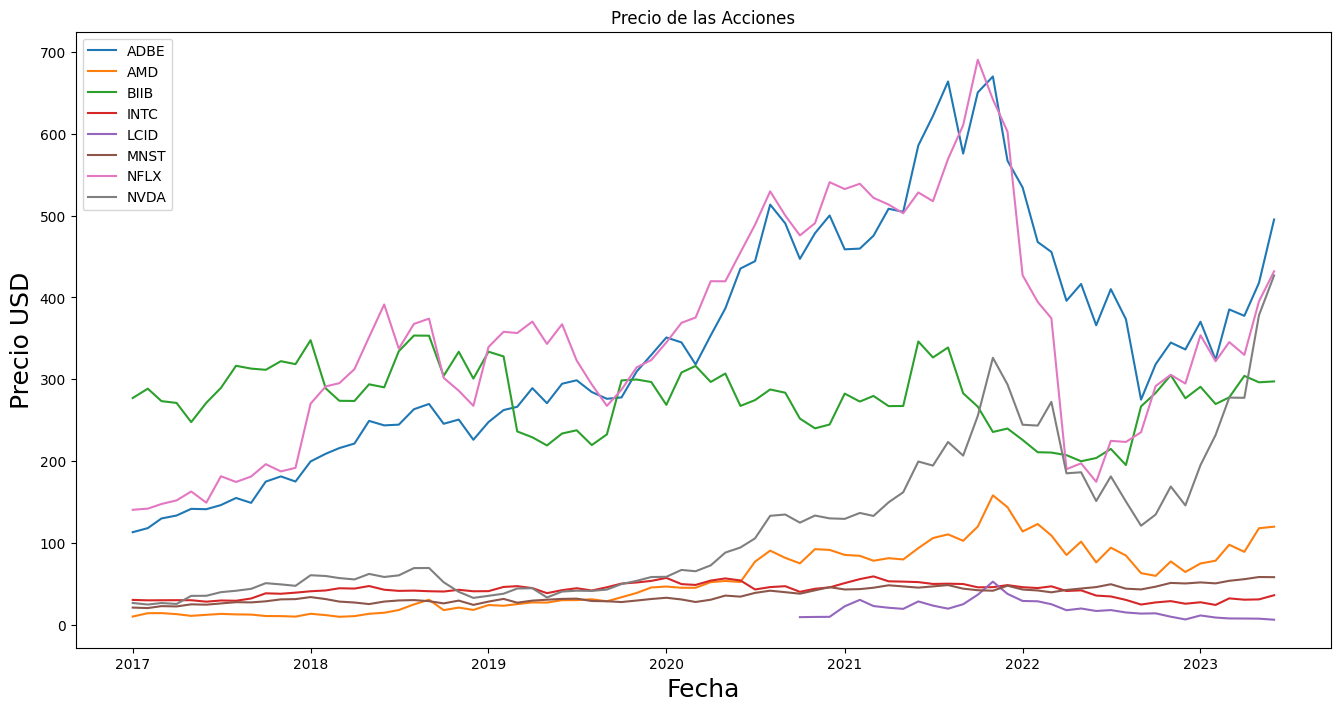

In [742]:
plt.figure(figsize=(16.2, 8))
for i in dataSet.columns.values:
    plt.plot(dataSet[i], label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Precio USD', fontsize=18)
plt.legend(dataSet.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=200, bbox_inches='tight')
plt.show()


### Calculamos el rendimiento de cada acción con el periodo anterior

In [743]:
''' Divide el valor de cada columna (df) por la columna anterior (df.shift(1))
    Luego le resta -1 para obtener el rendimiento.'''
rendimiento = (dataSet / dataSet.shift(1) -1).dropna()
rendimiento.head() * 100

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Date,,,,,,,,
2020-11-01,7.016326,23.070796,-4.720914,9.191486,2.596054,10.722214,3.144579,6.921176
2020-12-01,4.524838,-1.025259,1.952784,3.789800,1.315791,9.082336,10.195632,-2.585540
2021-01-01,-8.268017,-6.618689,15.416967,11.421127,128.571415,-6.109430,-1.542353,-0.470393
2021-02-01,0.196182,-1.319474,-3.442900,9.493789,34.396858,1.048020,1.213389,5.579401
2021-03-01,3.415490,-7.111587,2.517588,5.936929,-24.617885,3.818097,-3.190128,-2.670557


### Calculo de esperanza, varianza y desvío estandar

In [744]:
esp_var_desv = pd.DataFrame(rendimiento.mean() *100, columns=["Esperanza"])

esp_var_desv = esp_var_desv.T
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)
esp_var_desv

<ipython-input-744-92ca6a712313>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.var(ddof=0), columns=["Varianza"]).T)
<ipython-input-744-92ca6a712313>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  esp_var_desv = esp_var_desv.append(pd.DataFrame(rendimiento.std(ddof=0)*100, columns=["STD"]).T)


,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
Esperanza,0.955998,2.822584,1.019540,0.158061,3.062911,1.518499,0.907364,5.278832
Varianza,0.012365,0.027657,0.011074,0.010301,0.113915,0.003776,0.020404,0.027633
STD,11.119906,16.630369,10.523522,10.149419,33.751298,6.145254,14.284298,16.623242


### Distribución de rendimientos

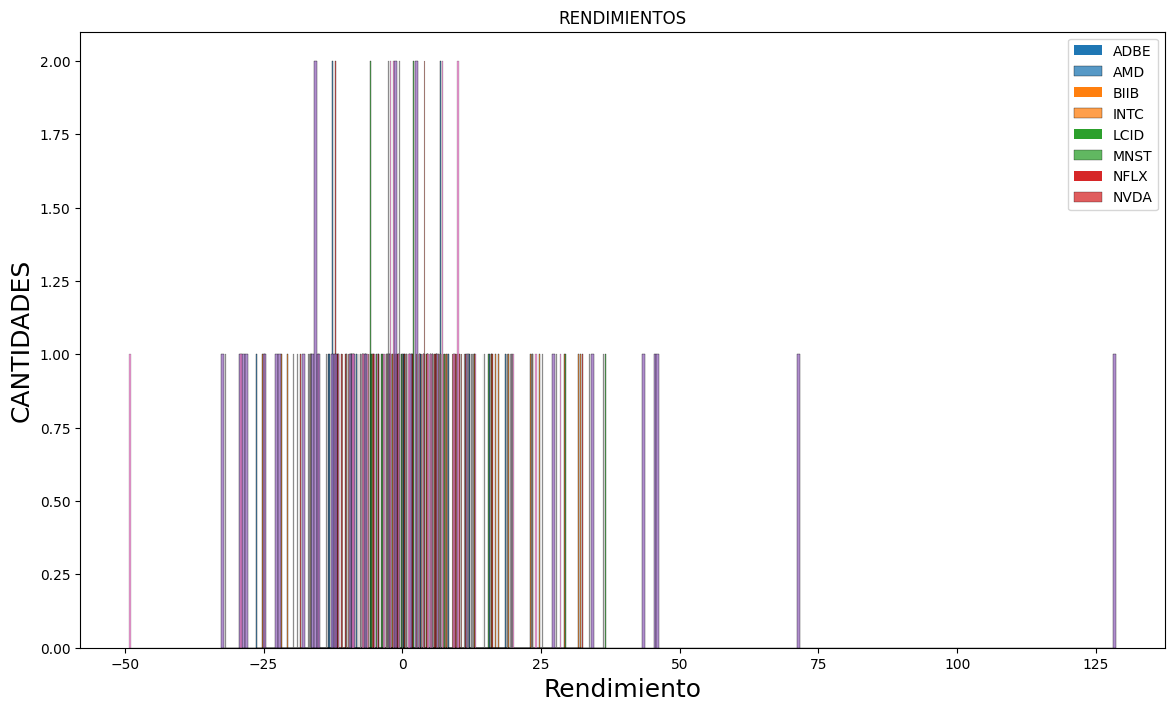

In [745]:
plt.figure(figsize=(14, 8))
for i in rendimiento.columns.values:
    #plt.hist(rendimiento[i]*100, label = i, bins=300)
    sns.histplot(rendimiento[i]*100, label=i, bins=300)
plt.title('RENDIMIENTOS')
plt.xlabel('Rendimiento', fontsize=18)
plt.ylabel('CANTIDADES', fontsize=18)
plt.legend(rendimiento.columns.values, loc='upper left')
plt.legend(rendimiento.columns.values)
#eliminamos los extremos con menos cantidad de datos.
#plt.xlim(-20,20)
plt.show()

### Matriz de covarianzas.
Valor que refleja en cómo varían dos variables de forma conjunta respecto a sus medias.

In [746]:
mCovarianza = rendimiento.cov(ddof=0, numeric_only=False)
cm = sns.light_palette("green", as_cmap=True)
mCovarianza.style.background_gradient(cmap=cm)

,ADBE,AMD,BIIB,INTC,LCID,MNST,NFLX,NVDA
ADBE,0.012365,0.012516,-0.000128,0.006470,0.005052,0.002014,0.008975,0.013108
AMD,0.012516,0.027657,-0.002094,0.007148,0.013871,0.002884,0.012206,0.022879
BIIB,-0.000128,-0.002094,0.011074,0.000152,0.007503,0.000762,0.002961,0.000453
INTC,0.006470,0.007148,0.000152,0.010301,0.007992,0.001729,0.005156,0.007296
LCID,0.005052,0.013871,0.007503,0.007992,0.113915,-0.006047,0.014196,0.018638
MNST,0.002014,0.002884,0.000762,0.001729,-0.006047,0.003776,0.001450,0.001411
NFLX,0.008975,0.012206,0.002961,0.005156,0.014196,0.001450,0.020404,0.015087
NVDA,0.013108,0.022879,0.000453,0.007296,0.018638,0.001411,0.015087,0.027633


### Carga de pruebas de WEIGHT, Rendimiento y riesgo del portafolio

#### Se definen 3 arrays
- PesosPortafolio = pesos randoms con cantidad de elementos igual al numero de activos.
- rportafolio = Rendimiento del portafolio
- sdPortafolio = desvio standard, o riesgo del portafolio

In [747]:
pesosPortafolio = []
rPortafolio = []
sdPortafolio = []

#guardamos la cantidad de activos que tenemos para el análisis.
nrosActivos = len(rendimiento.columns)
nrosActivos

8

In [748]:
for x in range(500):
    pesos = np.random.random(len(rendimiento.columns)) # Arreglo de 1 x la cantidad de activos
    # Dividir por la suma total de los números
    pesos /= np.sum(pesos)
    # Agrega cada prueba a la matriz
    pesosPortafolio.append(pesos)

    # Retorno la "sumaProducto" o el producto de la matriz
    # con los porcentajes de inversion X el rendimiento de cada activo
    rPortafolio.append(np.dot(rendimiento.mean(), pesos)) # rendimiento.mean() = matriz de 7X1

    # np.dot(mCovarianzas, pesos)  retorna matriz 1X7 de multiplicar los
    # pesos(porcentaje a invertir) y la matriz de covarianzas
    # A esa matriz de 1X7 de varianzas, la vuelvo a multiplicar por pesos.T
    # eso nos devuelve un solo resultado, la varianza de la inversion y
    # posteriormente el STD
    sdPortafolio.append(np.sqrt(
        np.dot(pesos.T, np.dot(mCovarianza, pesos))
    ))

#### Ejemplo
Para la primera distribución de la inversión en % en los 7 activos:

In [749]:
for i in range(len(pesosPortafolio[0])):
    print(rendimiento.columns[i],' -> ', round(pesosPortafolio[0][i]*100,2), '%')

ADBE  ->  1.54 %
AMD  ->  25.4 %
BIIB  ->  5.62 %
INTC  ->  23.83 %
LCID  ->  19.83 %
MNST  ->  4.8 %
NFLX  ->  11.16 %
NVDA  ->  7.82 %


Va a tener el siguiente rendimiento:

In [750]:
str(round(rPortafolio[0], 5)*100) + ' %'

'2.021 %'

Tiene el siguiente riesgo (%):

In [751]:
str(round(sdPortafolio[0], 3)*100) + ' %'

'12.0 %'

###Generación de diccionarios
A partir de estas 3 variables, vamos a buscar minimizar el riesgo y maximizar el retorno
Generamos un diccionario de listas -> lista de rendimiento, riesgo y una lista para cada acción con sus porcentajes de inversión

In [752]:
diccionario = {'Rendimiento': rPortafolio, 'Riesgo': sdPortafolio}
for i, accion in enumerate(rendimiento.columns.tolist()):
    diccionario['USD ' + accion] = [w[i] for w in pesosPortafolio]

Generamos un DataFrame a partir del diccionario para tener las inversiones, riesgo y rendimiento en una sola linea

In [753]:
matrizPortafolio = pd.DataFrame(diccionario)
matrizPortafolio

,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
0,0.020210,0.119891,0.015408,0.254010,0.056216,0.238284,0.198323,0.047960,0.111599,0.078200
1,0.024507,0.107154,0.021039,0.159147,0.151820,0.018847,0.148747,0.143196,0.168155,0.189048
2,0.022020,0.106118,0.144977,0.142544,0.072625,0.091741,0.171540,0.153604,0.083077,0.139891
3,0.020454,0.107954,0.157702,0.134524,0.026880,0.061060,0.154564,0.149071,0.203833,0.112366
4,0.023019,0.100714,0.058537,0.205090,0.065705,0.084179,0.024510,0.159732,0.195412,0.206837
...,...,...,...,...,...,...,...,...,...,...
495,0.019388,0.089284,0.107978,0.115734,0.266838,0.011390,0.151083,0.191994,0.077166,0.077817
496,0.019870,0.097485,0.068781,0.203215,0.094720,0.028984,0.210996,0.339249,0.045798,0.008256
497,0.016797,0.095426,0.137220,0.175524,0.134346,0.048778,0.148421,0.169791,0.179689,0.006230
498,0.016337,0.093202,0.051121,0.188325,0.197274,0.230562,0.102939,0.040612,0.128078,0.061090


## Frontera Eficiente
A continuación tenemos todas las carteras posibles con sus Riesgos y Rendimientos.

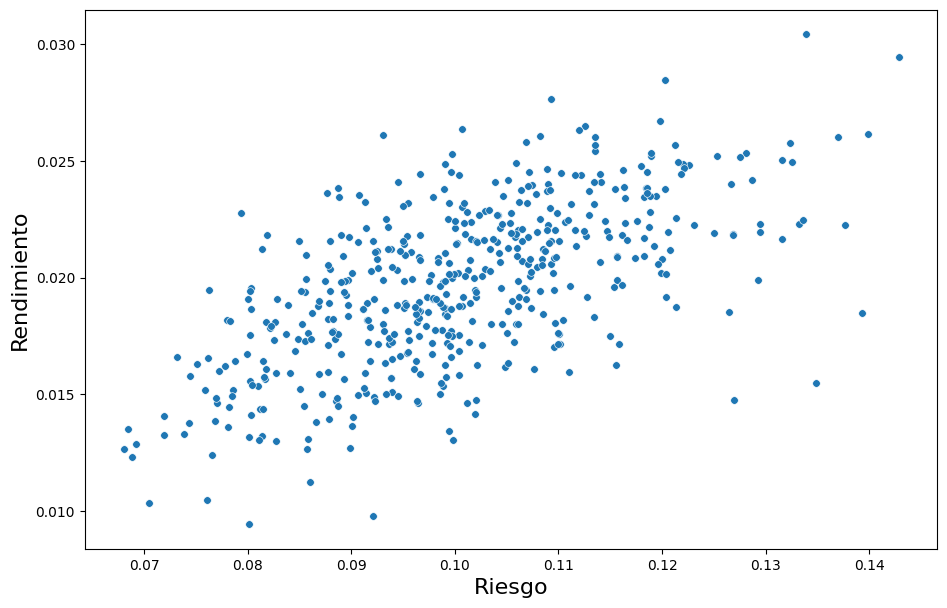

In [754]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

# ANÁLISIS

### Mínima Varianza
Buscamos el menor riesgo. Las carteras eficientes en las cuales deberíamos invertir, debe tener riesgo mayor a la mínima varianza, pero siempre mayor rendimiento.
En el siguiente gráfico están ubicadas por encima de la línea punteada.

In [755]:
minimaVarianza = matrizPortafolio.iloc[matrizPortafolio['Riesgo'].idxmin()]
display(minimaVarianza)
display(minimaVarianza.loc["Rendimiento"]*100)

Rendimiento    0.012665
Riesgo         0.067995
USD ADBE       0.071926
USD AMD        0.011839
USD BIIB       0.199489
USD INTC       0.264876
USD LCID       0.074759
USD MNST       0.252032
USD NFLX       0.080726
USD NVDA       0.044353
Name: 198, dtype: float64

1.2665000277391825

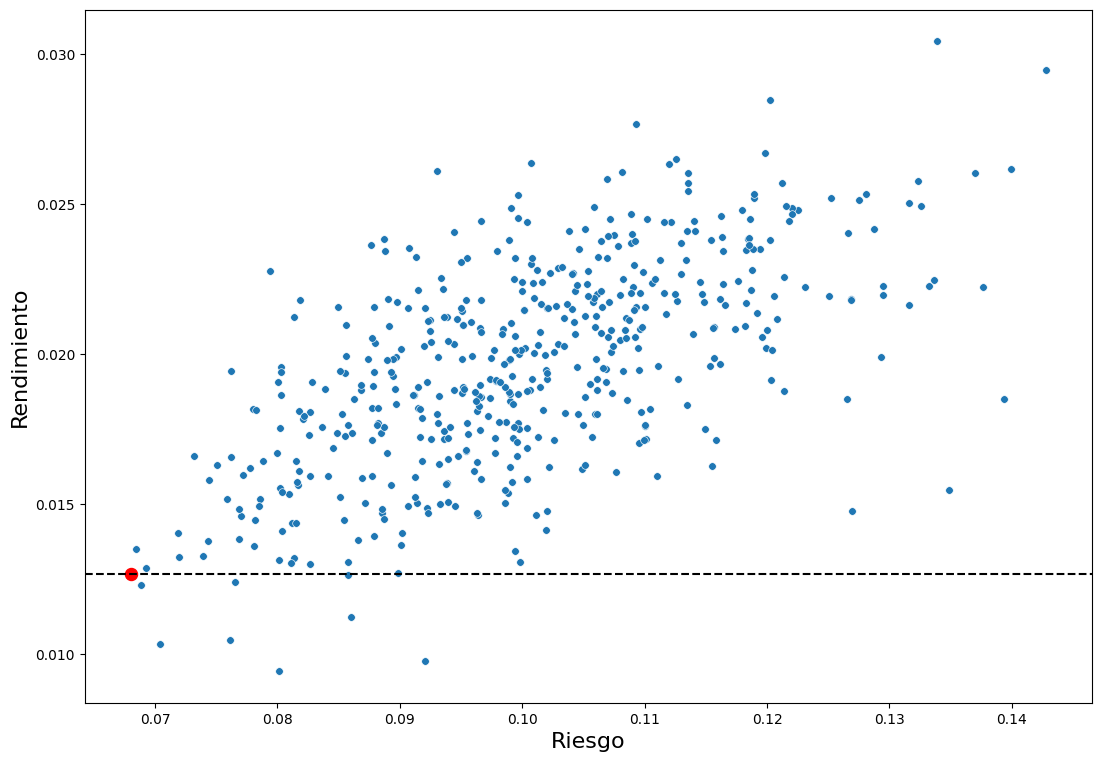

In [756]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.xlabel('Riesgo', fontsize=16)
plt.ylabel('Rendimiento', fontsize=16)
plt.show()

### Mayor rendimiento
Buscamos la inversión con mayor rendimiento de las pruebas.
A partir de este punto, todos los que se encuetran a la derecha de la línea punteada, serán irrelevantes porque tienene menor rendimiento y mayor riesgo.


In [757]:
mayorRendimiento = matrizPortafolio.loc[matrizPortafolio['Rendimiento'].idxmax()]
mayorRendimiento

Rendimiento    0.030434
Riesgo         0.133875
USD ADBE       0.114849
USD AMD        0.048618
USD BIIB       0.061314
USD INTC       0.003242
USD LCID       0.242919
USD MNST       0.100101
USD NFLX       0.097698
USD NVDA       0.331259
Name: 184, dtype: float64

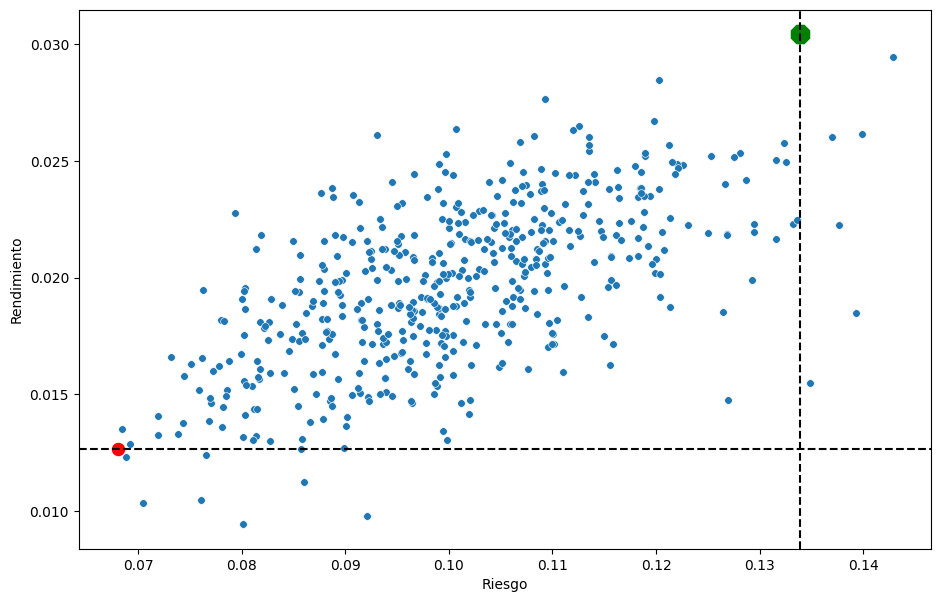

In [758]:
'''matrizPortafolio.plot(x='Riesgo',y='Rendimiento', kind='scatter', figsize=(13,9) )
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='*', s=300)
plt.scatter(x=optimo[1], y=optimo[0], color='green', marker='*', s=300)
plt.savefig('FronteraEficiente', dpi=200)'''


plt.figure(figsize=(11,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Cuadrante óptimo
Selección de los portafolios óptimos cuadrante superior izquierdo

In [759]:
m = matrizPortafolio
m = m[(m["Rendimiento"] >= minimaVarianza[0]) & (m["Riesgo"] <= mayorRendimiento[1])]

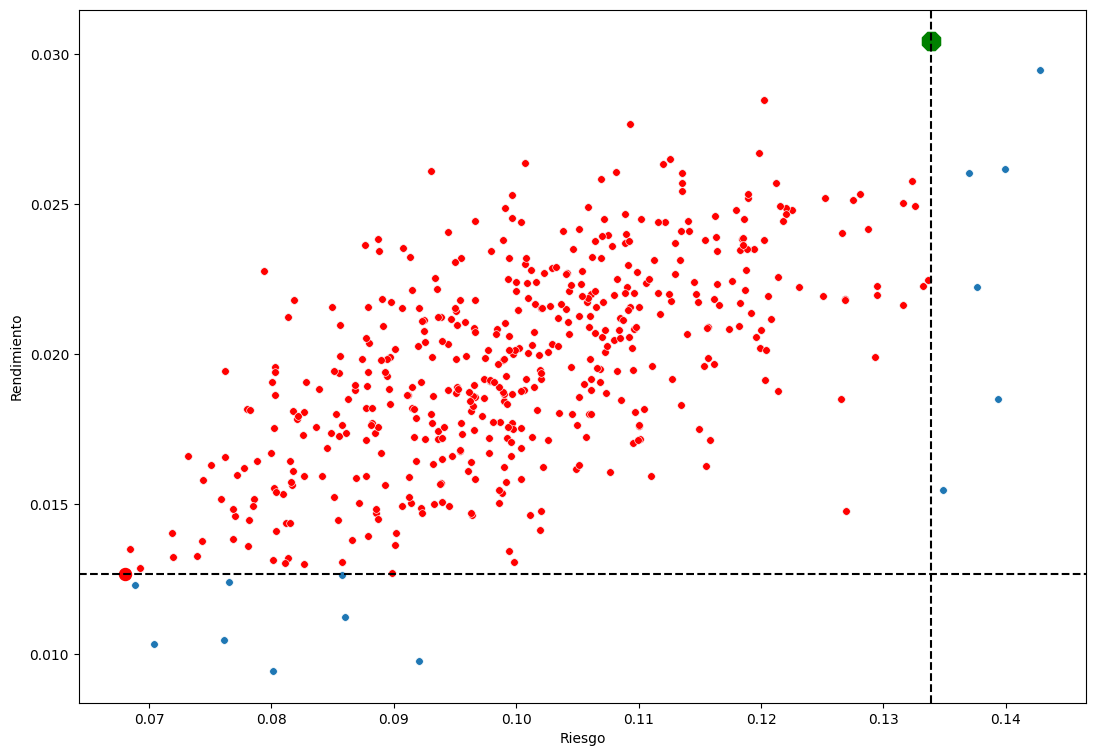

In [760]:
plt.figure(figsize=(13,9))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=m, x = 'Riesgo', y='Rendimiento', color="red", s=30)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='8', s=200)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)
plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Pendiente óptima

In [761]:
minimaVarianza

Rendimiento    0.012665
Riesgo         0.067995
USD ADBE       0.071926
USD AMD        0.011839
USD BIIB       0.199489
USD INTC       0.264876
USD LCID       0.074759
USD MNST       0.252032
USD NFLX       0.080726
USD NVDA       0.044353
Name: 198, dtype: float64

In [762]:
# Encontrar la pendiente de la línea recta que cruza los dos puntos.
x1, y1 = minimaVarianza['Riesgo'], minimaVarianza['Rendimiento']
x2, y2 = mayorRendimiento['Riesgo'], mayorRendimiento['Rendimiento']
pendiente = (y2 - y1) / (x2 - x1)
print("Pendiente: ", pendiente)
b = y1 - pendiente * x1
print("Punto de corte", b)


Pendiente:  0.2697166697350776
Punto de corte -0.0056743195233376256


In [763]:
'''x_vals, y_vals = [], []
for index, row in m.iterrows():
    x = row['Riesgo']
    y = row['Rendimiento']
    if y >= pendiente * x + b:
        x_vals.append(x)
        y_vals.append(y)
pendiente_optima = pd.DataFrame({'Riesgo': x_vals, 'Rendimiento': y_vals})'''

"x_vals, y_vals = [], []\nfor index, row in m.iterrows():\n    x = row['Riesgo']\n    y = row['Rendimiento']\n    if y >= pendiente * x + b:\n        x_vals.append(x)\n        y_vals.append(y)\npendiente_optima = pd.DataFrame({'Riesgo': x_vals, 'Rendimiento': y_vals})"

In [764]:
pendiente_optima = pd.DataFrame(columns = m.columns)
for index, row in m.iterrows():
    if row['Rendimiento'] >= pendiente * row['Riesgo'] + b:
       pendiente_optima = pendiente_optima.append(row)

pendiente_optima.reset_index(drop=True, inplace=True) ;

<ipython-input-764-dfa95f7a921b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pendiente_optima = pendiente_optima.append(row)
<ipython-input-764-dfa95f7a921b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pendiente_optima = pendiente_optima.append(row)
<ipython-input-764-dfa95f7a921b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pendiente_optima = pendiente_optima.append(row)
<ipython-input-764-dfa95f7a921b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pendiente_optima = pendiente_optima.append(row)
<ipython-input-764-dfa95f7a921b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

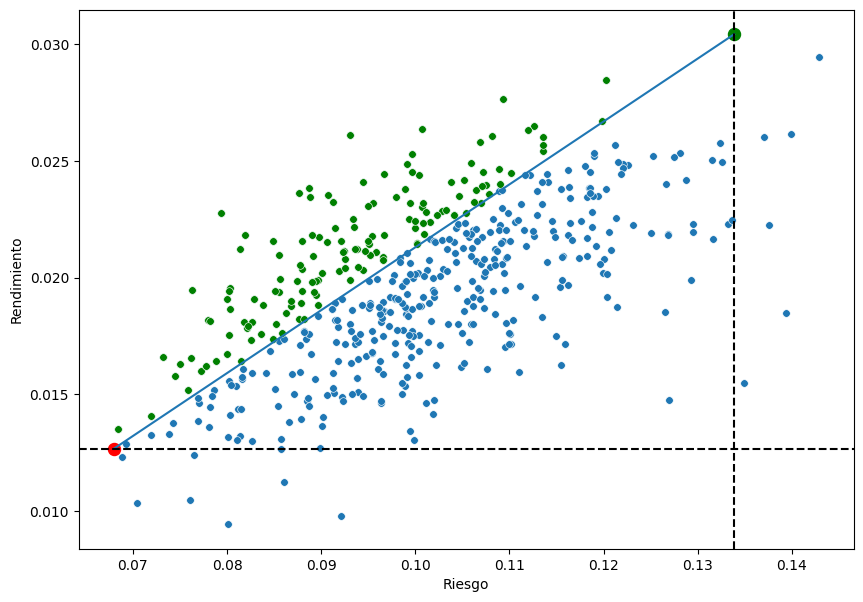

In [765]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=matrizPortafolio, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data=pendiente_optima, x = 'Riesgo', y='Rendimiento', color="green", s=30)


# Puntos de menor riesgo(rojo) y mayor retorno(Verde)
plt.scatter(x=mayorRendimiento[1], y=mayorRendimiento[0], color='green', marker='.', s=300)
plt.scatter(x=minimaVarianza[1], y=minimaVarianza[0], color='red', marker='.', s=300)

plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])


plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

### Definición de carteras según perfil de riesgo del inversor

 Borramos las carteras que no vamos a tomar

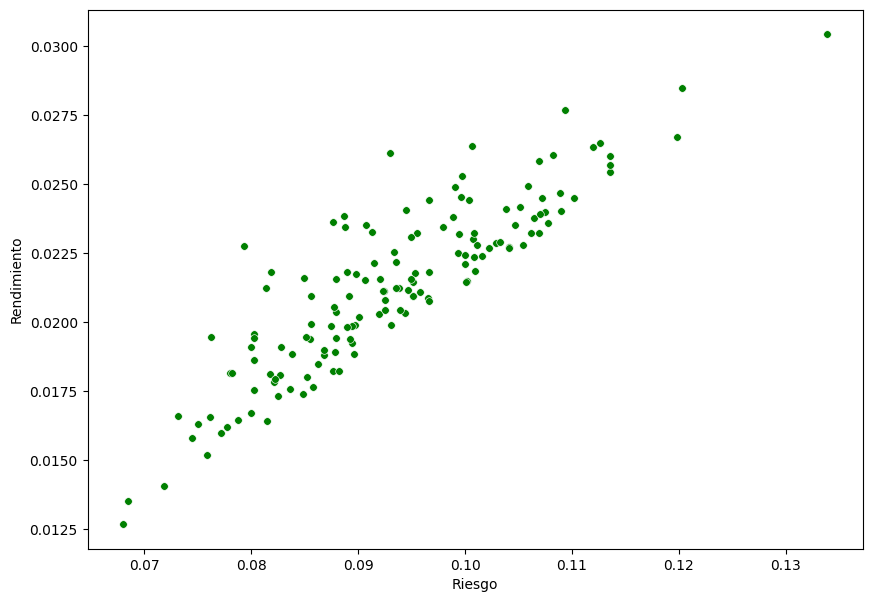

In [766]:
plt.figure(figsize=(10,7))
sns.scatterplot(data= pendiente_optima, x = 'Riesgo', y='Rendimiento',color='green', s=30)

#plt.plot([mayorRendimiento[1], minimaVarianza[1]], [mayorRendimiento[0], minimaVarianza[0]])
#plt.axhline(y=minimaVarianza[0], color='black', linestyle='--')
#plt.axvline(x=mayorRendimiento[1], color='black', linestyle='--')
plt.show()

#### Definir los 3 perfiles
Dividir en 3 sectores del gráfico según perfil del riesgo

In [767]:
division = (pendiente_optima['Riesgo'].max()  - pendiente_optima['Riesgo'].min()) / 3
division
bajo = pendiente_optima['Riesgo'].min() + division
medio = bajo + division

In [768]:
# Perfil Bajo
perfil_bajo = pendiente_optima[(pendiente_optima["Riesgo"] >= pendiente_optima["Riesgo"].min()) &
                 (pendiente_optima["Riesgo"] <= bajo)]
maximo_perfil_bajo = perfil_bajo.loc[perfil_bajo['Rendimiento'].idxmax()]
print(f"Máximo rendimiento para perfil bajo: \n {maximo_perfil_bajo} \n ---------------")

# Perfil Medio
perfil_medio = pendiente_optima[(pendiente_optima["Riesgo"] >= bajo) &
                 (pendiente_optima["Riesgo"] <= medio)]
maximo_perfil_medio = perfil_medio.loc[perfil_medio['Rendimiento'].idxmax()]
print(f"Máximo rendimiento para perfil Medio: \n {maximo_perfil_medio} \n ---------------")

# Perfil Alto
perfil_alto = pendiente_optima[pendiente_optima["Riesgo"] >= medio]
maximo_perfil_alto = perfil_alto.loc[perfil_alto['Rendimiento'].idxmax()]
print(f"Máximo rendimiento para perfil Alto: \n {maximo_perfil_alto} \n ---------------")

Máximo rendimiento para perfil bajo: 
 Rendimiento    0.023841
Riesgo         0.088719
USD ADBE       0.010477
USD AMD        0.136589
USD BIIB       0.103237
USD INTC       0.166828
USD LCID       0.050476
USD MNST       0.227448
USD NFLX       0.057842
USD NVDA       0.247105
Name: 9, dtype: float64 
 ---------------
Máximo rendimiento para perfil Medio: 
 Rendimiento    0.027668
Riesgo         0.109308
USD ADBE       0.049257
USD AMD        0.189403
USD BIIB       0.184494
USD INTC       0.053480
USD LCID       0.099095
USD MNST       0.057832
USD NFLX       0.077116
USD NVDA       0.289323
Name: 68, dtype: float64 
 ---------------
Máximo rendimiento para perfil Alto: 
 Rendimiento    0.030434
Riesgo         0.133875
USD ADBE       0.114849
USD AMD        0.048618
USD BIIB       0.061314
USD INTC       0.003242
USD LCID       0.242919
USD MNST       0.100101
USD NFLX       0.097698
USD NVDA       0.331259
Name: 51, dtype: float64 
 ---------------


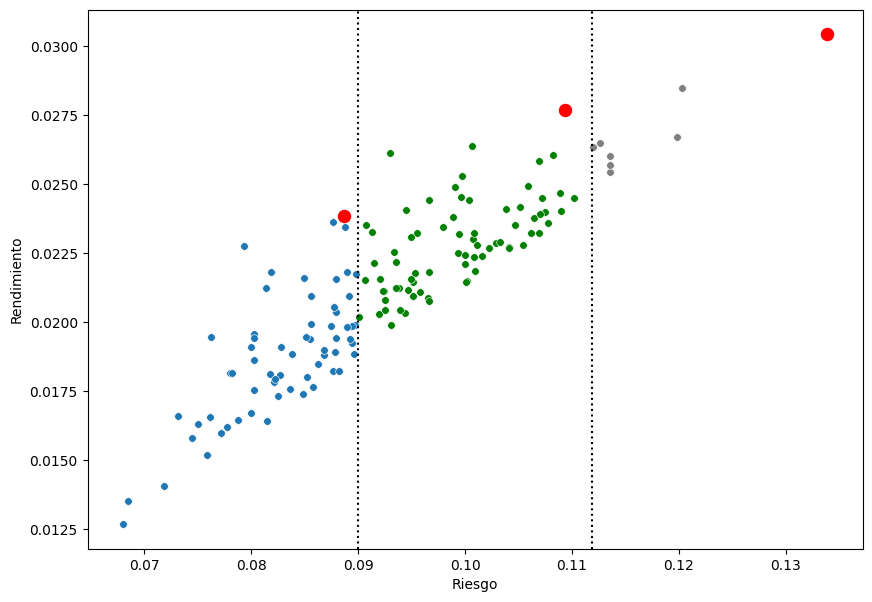

In [769]:
plt.figure(figsize=(10,7))

sns.scatterplot(data= perfil_bajo, x = 'Riesgo', y='Rendimiento', s=30)
sns.scatterplot(data= perfil_medio, x = 'Riesgo', y='Rendimiento', color='green', s=30)
sns.scatterplot(data= perfil_alto, x = 'Riesgo', y='Rendimiento', color='grey', s=30)

# Lineas verticales
plt.axvline(x=bajo, color='black', linestyle=':')
plt.axvline(x=medio, color='black', linestyle=':')

# Puntos máximos por perfil
plt.scatter(x=maximo_perfil_bajo[1], y=maximo_perfil_bajo[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_medio[1], y=maximo_perfil_medio[0], color='red', marker='.', s=300)
plt.scatter(x=maximo_perfil_alto[1], y=maximo_perfil_alto[0], color='red', marker='.', s=300)

plt.show()

In [770]:
maximo_perfil_bajo = pd.DataFrame(maximo_perfil_bajo)
column_name = maximo_perfil_bajo.columns[0]
maximo_perfil_bajo.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_bajo['Total %'] = round(maximo_perfil_bajo['Total %'] * 100,2)
maximo_perfil_bajo['Total %'] = maximo_perfil_bajo['Total %'].astype(str) + " %"



In [771]:
maximo_perfil_medio = pd.DataFrame(maximo_perfil_medio)
column_name = maximo_perfil_medio.columns[0]
maximo_perfil_medio.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_medio['Total %'] = round(maximo_perfil_medio['Total %'] * 100,2)
maximo_perfil_medio['Total %'] = maximo_perfil_medio['Total %'].astype(str) + " %"


In [772]:
maximo_perfil_alto = pd.DataFrame(maximo_perfil_alto)
column_name = maximo_perfil_alto.columns[0]
maximo_perfil_alto.rename(columns={column_name: "Total %"}, inplace=True)
maximo_perfil_alto['Total %'] = round(maximo_perfil_alto['Total %'] * 100,2)
maximo_perfil_alto['Total %'] = maximo_perfil_alto['Total %'].astype(str) + " %"

In [773]:
print("INVERSIÓN TOTAL PARA PERFIL BAJO: ")
display(maximo_perfil_bajo.T)
print("INVERSIÓN TOTAL PARA PERFIL MEDIO: ")
display(maximo_perfil_medio.T)
print("INVERSIÓN TOTAL PARA PERFIL ALTO: ")
display(maximo_perfil_alto.T)

INVERSIÓN TOTAL PARA PERFIL BAJO: 


,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,2.38 %,8.87 %,1.05 %,13.66 %,10.32 %,16.68 %,5.05 %,22.74 %,5.78 %,24.71 %


INVERSIÓN TOTAL PARA PERFIL MEDIO: 


,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,2.77 %,10.93 %,4.93 %,18.94 %,18.45 %,5.35 %,9.91 %,5.78 %,7.71 %,28.93 %


INVERSIÓN TOTAL PARA PERFIL ALTO: 


,Rendimiento,Riesgo,USD ADBE,USD AMD,USD BIIB,USD INTC,USD LCID,USD MNST,USD NFLX,USD NVDA
Total %,3.04 %,13.39 %,11.48 %,4.86 %,6.13 %,0.32 %,24.29 %,10.01 %,9.77 %,33.13 %


In [774]:
rendimiento_diario = 0.0016  # Rendimiento diario del 0.3%

dias_en_mes = 30  # Número de días en un mes (puedes ajustarlo según corresponda)

rendimiento_mensual = (1 + rendimiento_diario)**dias_en_mes - 1

rendimiento_mensual_porcentaje = rendimiento_mensual * 100

print("Rendimiento mensual:", rendimiento_mensual_porcentaje, "%")

Rendimiento mensual: 4.913041086571002 %
